# Group Project: Data-driven Business Manager with APIs

#### Number of points: 30 (weights 30% in the final grade)
#### Deadline to form the groups: October 18th at 12:30 pm CET
#### Deadline for the code submission: October 24th at 01:29 pm CET
#### Presentations on October 24th

## Objective
In this project, you will create a Business that utilizes various APIs to make informed decisions about running your local business. If you want to sell drinks or street food or whatever floats your boat, do not hesitate to find your data and design the project accordingly. You will collect data from meteorological and non-meteorological APIs to help your business determine when, where, and how much inventory is needed to maximize sales. 

## Grading

In total, the group project counts for 30% of the final grade and represents 30 points.

The points are distributed in two parts: the code and the presentation.

- Some items e.g. Statistics are represented in both parts and will require to compute them in the code **and** present them during the presentation.
- Please note that the data must come from an API. You need to use at least 3 APIs (weather + two others). You can also of course use data downloaded from the internet, however they cannot replace the API data.
- Additionally, emphasis will be put on the **Storytelling** and whether or not the choice of APIs, data processing, statistics and visualisations are relevant for your business.
- To make grading easier, please provide **clean code** with **relevant comments** to make it straightforward what you are doing.
- Everyone in the group project must present during presentation day. **A penalty of -2 points** will be applied to each person **who does not present a significant part** during the presentation.


| **Code** | **15 points** |
| --- | --- |
| A. Collect data from weather API | 3 points |
| B. Collect data from two other non-meteorological APIs | 4 points |
| C. Data cleaning and processing | 3 points |
| D. Compute relevant statistics | 2 points |
| E. Clean and clear visualisations  | 3 points |


| **Presentation** | **15 points** |
| --- | --- |
| 1. Description of unique business idea | 1 point |
| 2. Presentation of all the APIs used and how it serves your business | 3 points |
| 3. Presentation of the data cleaning and processing | 2 points |
| 4. Presentation of the statistics | 2 points |
| 5. Presentation of the visualisations and how they serve the business| 3 points |
| 6. Storytelling | 4 points |

**Penalty: -2 points to each person who does not present a significant part during the presentation.**


**Penalty for unexcused absence or lateness**: 
- If you are absent or late on presentation day without an official excuse, you will receive 0 for the presentation part of the group project.
- If you are late without an official excuse and can still make it to the presentation of your team, you will still receive 0 for the presentation part of the group project.

## Getting Ready
#### Recommended deadline: October 8th
#### Deadline: October 18th at 12:30 pm CET

1. Form your group and select a group name. Communicate your group name to the teacher along with the First Name and Last Name of all the team members.

2. Create a branch on the **Students** repository with your group name (exactly the same as the one communicated to the teacher).

3. Discuss with your group and answer the following questions:

   - What kind of business do we run? What do we sell ? The choice of the business must be original and unique to your group.
   - How do we name our business?
   - When do we operate? Is it an all-year-round business or a seasonal one? If so, which seasons? Which months / weeks / days / hours of the day do we operate?
   - Where do we operate? In which countries / cities are we currently active ? Where do we want to develop in the future ? Determine where to set up your business stand based on weather conditions, local attractions, or events. The location should maximize customer traffic and sales.

## Code | A. Collect data from weather API | 3 points
#### Recommended deadline: October 18th
#### Deadline: October 24th at 01:29 pm CET
Use the OpenWeatherMap API to fetch weather data for your chosen location. You can select any city or location for your business.

- Fetch your chosen location's current temperature and weather conditions.
- Fetch the forecasted weather data for the next few days (e.g., five days).

## Code | B. Collect data from two other APIs | 4 points
#### Recommended deadline: October 18th
#### Deadline: October 24th at 01:29 pm CET
Integrate with **at least two** of the non-meteorological APIs you've learned about based on the location and the season.

It has to be with an API (not a downloaded dataset). 

You can of course use a downloaded dataset on top of the two APIs you've chosen.

You can also use more APIs, sky is the limit!

You can choose from:
- Google Maps,
- TripAdvisor,
- News API,
- Yelp,
- Wikipedia,
- Booking,
- Amadeus Travel API,
- Foursquare,
- etc. (make your own research and be original!)

Each API can provide different types of information. Pick the ones that best suit your application.


After collecting all the data you need, save them.

In [ ]:
import requests

In [ ]:
#API to analyze the current thrift shop locations in Berlin

url = "https://local-business-data.p.rapidapi.com/search-in-area"

querystring = {"query":"thrift","lat":"52.520008","lng":"13.404954","zoom":"7","limit":"500","language":"en","region":"de","extract_emails_and_contacts":"false"}

headers = {
	"x-rapidapi-key": "f776f7f50amsha00117476f19c09p163448jsn52f8e8292b66",
	"x-rapidapi-host": "local-business-data.p.rapidapi.com"
}

response_locations = requests.get(url, headers=headers, params=querystring)

print(response_locations.status_code) # check the status of the API request, 200 is good

## Code | C. Data cleaning and processing | 3 points
#### Recommended deadline: from October 18th until October 21st
#### Deadline: October 24th at 01:29 pm CET

In order to make data-driven decisions, you will need to clean the collected data, fill missing values, merge datasets etc.

Take some time to clean and process the collected data so that you can use it.

Organize the dataset into a structured format, such as a CSV file, HTML file, EXCEL file, and a table where each row represents the achieved data.

In [ ]:
pip install geopandas

In [ ]:
pip install folium

In [ ]:
# import required packages
import pandas as pd
import json
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Convert API response to dataframe
api_response = response_locations.json()
data = api_response['data']
df = pd.DataFrame(data)
df.head(5) # visualize the dataframe

In [ ]:
#Select relevant columns from location dataframe
df_maps = df[['name', 'street_address', 'latitude', 'longitude', 'district']]
df_maps # view the updated dataframe

In [ ]:
#Missing data from thrift shop location dataframe
df_maps.isna().sum()

In [ ]:
df_maps = df_maps.dropna(subset=['district']) # drop rows with missing districts

In [ ]:
# Check for duplicates in the 'street address' column
duplicates = df_maps['street_address'].duplicated(keep=False)  # keep=False marks all duplicates as True
duplicates.value_counts()

In [ ]:
# Visualize duplicate rows
duplicate_rows = df_maps[duplicates]
duplicate_rows

In [ ]:
# drop the duplicate row and reset the index
df_maps = df_maps.drop(index=0).reset_index(drop=True)

In [ ]:
# Create a dictionary with rental prices per square meter for each district (new properties)
# Obtained from https://guthmann.estate/en/market-report/berlin/
rental_prices = {
    'Charlottenburg-Wilmersdorf': 11.13,
    'Mitte': 13.08,
    'Pankow': 6.95,
    'Friedrichshain-Kreuzberg': 9.15,
    'Lichtenberg': 7.22,
    'Neukölln': 8.43,
    'Reinickendorf': 7.17,
    'Tempelhof-Schöneberg': 6.47,
    'Spandau': 6.94,
    'Steglitz-Zehlendorf': 7.86,
    'Herzberg/Elster': None,  # No data
    'Innenstadt': None,        # No data
    'Genshagen': None,         # No data
    'Potsdam Südost': None     # No data
}

# Add a new column to df_maps for rental prices per square meter
df_maps['price_per_m2'] = df_maps['district'].map(rental_prices)

In [ ]:
# View the updated dataframe
df_maps.head()

In [ ]:
# Apply conditions to filter out any invalid longitude and latitude numbers
df_maps.loc[~((df_maps['latitude'].between(52.4, 52.7)) & (df_maps['longitude'].between(13.1, 14))), ['latitude', 'longitude']] = np.nan


## Code | D. Compute relevant statistics | 2 points
#### Recommended deadline: from October 18th until October 21st
#### Deadline: October 24th at 01:29 pm CET

Get together as a group and ask yourselves: what business questions would you like to answer? For example:

- On which days are there maximum customer traffic?
- On which days do we expect to make more sales?
- How much inventory should we get? Why?
- Which impact would the weather conditions, local attractions or events have on your business?
- How would you like to develop the business in the future?
    - Do you wish to expand to new locations?
    - Launch a new product?
    - Target more elderly or young people?
    - Target vegetarian or book-worm people?

Compute descriptive statistics that inform you about the future of your business and enable you to answer the business questions.|


In [ ]:
#Summarize by district
thrift_district = df_maps['district'].value_counts()
thrift_district

## Code | E. Clean and clear visualisations  | 3 points
#### Deadline: October 24th at 01:29 pm CET

Create **at least 3 data visualisations** that clearly state your point and support your decision-making. 


**Presentation: present each data visualisation and integrate them in your storytelling. Explain why they are relevant for your decision-making.**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
sns.barplot(x=thrift_district.index, y=thrift_district.values)

# Customize the plot 
plt.xticks(rotation=45)  # Rotate the x labels for better readability 
plt.xlabel('District')
plt.ylabel('Count')
plt.title('Number of Thrift Stores by District')

# Show the plot
plt.tight_layout()  # Adjust layout so everything fits without overlap
plt.show()

In [ ]:
# Load the Berlin districts GeoJSON
districts = gpd.read_file('/Users/arjunchahal/Desktop/ESMT/Data Scraping/Working_Directory/working_folder/bezirksgrenzen.geojson')

# Merge with df_maps
districts = districts.merge(df_maps, left_on='Gemeinde_name', right_on='district', how='left')

# Plot the districts, colored by price_per_m2
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
districts.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot district boundaries
districts.plot(column='price_per_m2', ax=ax, legend=True, cmap='Blues', edgecolor='black', label = 'Avg Price/m^2')  # Shaded map using the Blues sequential colourmap

# Plot thrift store locations
df_maps.plot(kind='scatter', x='longitude', y='latitude', color='red', ax=ax, label='Thrift Store Locations')

for x, y, label in zip(districts.geometry.centroid.x, districts.geometry.centroid.y, districts['Gemeinde_name']):
    ax.text(x, y, label, fontsize=6, ha='center', va='center')

# Customize the plot, use x and y to manipulate title and subtitle positioning
plt.title('Mitte and Charlottenburg are the most expensive areas to rent spaces.', fontsize=16, x=0.4)
plt.suptitle('Berlin Districts shaded by Average Rental Price per square metre', x=0.2, y=0.8) 
plt.legend()

ax.set_axis_off() # hide the longitude and latitude axis

# Show the plot
plt.tight_layout()
plt.show()

## Presentation | 15 points
#### Deadline: October 24th during class

> Make a presentation about your business, the data you've collected and the direction you're taking the business in the next months.

**Presentation | 1. Description of unique business idea | 1 point**

Summarise the name and choice of business as well as location and the time of year it operates (you can add some branding, logo, etc.)


**Presentation | 2. Presentation of all the APIs used and how it serves your business | 3 points**

Present each API and explain why the collected data is relevant for your business.


**Presentation | 3. Presentation of the data cleaning and processing | 2 points**

Explain the steps your team took in order to get to a clean and structured dataset.


**Presentation | 4. Presentation of the statistics  & 5. Data visualisations | 5 points**

Display the statistics and relevant data visualisations that helped you make informed decisions about your business. The descriptive statistics and visualisations enable you to draw conclusions that take your business in one or the other direction. You need to explain how this information serves your business and the next steps you will take.

**Presentation | 6. Storytelling | 4 points**

Why did you pick this business idea? Why this name?

Who is your target audience? What problem does it solve?

What decisions did you make to make your business thrive in the future? What are your current challenges? Opportunities?

Can Data save your business or make it expand to new territories?


Create a good story!

In [ ]:
# Ignore all this mess down here

In [3]:
#API to analyze the current thrift shop locations in Berlin

url = "https://local-business-data.p.rapidapi.com/search-in-area"

querystring = {"query":"thrift","lat":"52.520008","lng":"13.404954","zoom":"7","limit":"500","language":"en","region":"de","extract_emails_and_contacts":"false"}

headers = {
	"x-rapidapi-key": "f776f7f50amsha00117476f19c09p163448jsn52f8e8292b66",
	"x-rapidapi-host": "local-business-data.p.rapidapi.com"
}

response_locations = requests.get(url, headers=headers, params=querystring)

print(response_locations.json())

{'status': 'OK', 'request_id': '596e67ba-c116-47b1-87dc-d5dc89a7775e', 'parameters': {'query': 'thrift', 'language': 'en', 'region': 'de', 'lat': 52.520008, 'lng': 13.404954, 'zoom': 7, 'limit': 500, 'extract_emails_and_contacts': False}, 'data': [{'business_id': '0x47a851f9335dc22d:0x89fa11d7e805647f', 'google_id': '0x47a851f9335dc22d:0x89fa11d7e805647f', 'place_id': 'ChIJLcJdM_lRqEcRf2QF6NcR-ok', 'google_mid': '/g/1tf19smn', 'phone_number': '+493044033737', 'name': 'Pauls Boutique/Berlin', 'latitude': 52.53902, 'longitude': 13.40785, 'full_address': 'Pauls Boutique/Berlin, Oderberger Str. 47, 10435 Berlin', 'review_count': 326, 'rating': 4.2, 'timezone': 'Europe/Berlin', 'opening_status': 'Open ⋅ Closes 8\u202fpm', 'working_hours': {'Wednesday': ['12–8 pm'], 'Thursday': ['12–8 pm'], 'Friday': ['12–8 pm'], 'Saturday': ['12–8 pm'], 'Sunday': ['Closed'], 'Monday': ['12–8 pm'], 'Tuesday': ['12–8 pm']}, 'website': 'http://www.paulsboutiqueberlin.de', 'verified': True, 'place_link': 'https

In [4]:
import pandas as pd
import json

# Convert API response to dataframe
api_response = response_locations.json()
data = api_response['data']
df = pd.DataFrame(data)

In [5]:
df.head(5)

,business_id,google_id,place_id,google_mid,phone_number,name,latitude,longitude,full_address,review_count,...,about,address,order_link,price_level,district,street_address,city,zipcode,state,country
0,0x47a851f9335dc22d:0x89fa11d7e805647f,0x47a851f9335dc22d:0x89fa11d7e805647f,ChIJLcJdM_lRqEcRf2QF6NcR-ok,/g/1tf19smn,+493044033737,Pauls Boutique/Berlin,52.539020,13.407850,"Pauls Boutique/Berlin, Oderberger Str. 47, 104...",326,...,"{'summary': None, 'details': {'Service options...","Oderberger Str. 47, 10435 Berlin",None,None,Pankow,Oderberger Str. 47,Berlin,10435,None,DE
1,0x47a8504a3fce8cad:0xb019f479737005a7,0x47a8504a3fce8cad:0xb019f479737005a7,ChIJrYzOP0pQqEcRpwVwc3n0GbA,/g/1vl5ftc1,+493644534472,ReSales Tiergarten-Schöneberg,52.500366,13.363554,"ReSales Tiergarten-Schöneberg, Potsdamer Str. ...",163,...,"{'summary': None, 'details': {'Service options...","Potsdamer Str. 105, 10785 Berlin",None,None,Mitte,Potsdamer Str. 105,Berlin,10785,None,DE
2,0x47a84e679932813f:0x6fad566beea99812,0x47a84e679932813f:0x6fad566beea99812,ChIJP4EymWdOqEcREpip7mtWrW8,/g/1tfb5lr4,+49304222018,HUMANA Secondhand & Vintage,52.516715,13.454294,"HUMANA Secondhand & Vintage, Frankfurter Tor 3...",2566,...,"{'summary': None, 'details': {'Service options...","Frankfurter Tor 3, 10243 Berlin",None,None,Friedrichshain-Kreuzberg,Frankfurter Tor 3,Berlin,10243,None,DE
3,0x47a84f045aceb7ff:0x2b492656fcb8461,0x47a84f045aceb7ff:0x2b492656fcb8461,ChIJ_7fOWgRPqEcRYYTLb2WStAI,/g/11lfzk2wvv,+4915758243057,PeekUp,52.473459,13.441441,"PeekUp, Karl-Marx-Platz 4, 12043 Berlin",152,...,"{'summary': None, 'details': {'Service options...","Karl-Marx-Platz 4, 12043 Berlin",None,None,Neukölln,Karl-Marx-Platz 4,Berlin,12043,None,DE
4,0x47a851ad0461c199:0x9484de7bf1a0ba86,0x47a851ad0461c199:0x9484de7bf1a0ba86,ChIJmcFhBK1RqEcRhrqg8XvehJQ,/g/11mtsksxpr,+493030608282,Humana Secondhand & Vintage,52.519382,13.388173,"Humana Secondhand & Vintage, Friedrichstraße 1...",167,...,"{'summary': None, 'details': {'Service options...","Friedrichstraße 148, 10117 Berlin",None,None,Mitte,Friedrichstraße 148,Berlin,10117,None,DE


In [67]:
#Select relevant columns from location dataframe
df_maps = df[['name', 'street_address', 'latitude', 'longitude', 'district']]

In [68]:
df_maps

,name,street_address,latitude,longitude,district
0,Pauls Boutique/Berlin,Oderberger Str. 47,52.539020,13.407850,Pankow
1,ReSales Tiergarten-Schöneberg,Potsdamer Str. 105,52.500366,13.363554,Mitte
2,HUMANA Secondhand & Vintage,Frankfurter Tor 3,52.516715,13.454294,Friedrichshain-Kreuzberg
3,PeekUp,Karl-Marx-Platz 4,52.473459,13.441441,Neukölln
4,Humana Secondhand & Vintage,Friedrichstraße 148,52.519382,13.388173,Mitte
...,...,...,...,...,...
62,Dreikäsehoch Children's Second Hand,Hauptstraße 73,52.474778,13.338915,Tempelhof-Schöneberg
63,Trödelmaik,Senftenberger Str. 16,51.439430,14.241489,None
64,Berlin-Military Showroom,Sterkrader Str. 49-59,52.579023,13.281494,Reinickendorf
65,Benjamin Engel Wohnungsauflösungen,Bahnhofstraße 19,52.564566,13.099445,None


In [96]:
#Missing data from thrift shop location dataframe
df_maps.isna().sum()

name              0
street_address    0
latitude          5
longitude         5
district          0
price_per_m2      5
dtype: int64

In [97]:
# Check for duplicates in the 'street address' column
duplicates = df_maps['street_address'].duplicated(keep=False)  # keep=False marks all duplicates as True

In [98]:
duplicates.value_counts()

False    58
Name: street_address, dtype: int64

In [95]:
duplicate_rows = df_maps[duplicates]
duplicate_rows

/var/folders/l2/5dz48bnd55v2vjw18pnq7ftm0000gn/T/ipykernel_45423/1698700900.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  duplicate_rows = df_maps[duplicates]


,name,street_address,latitude,longitude,district,price_per_m2
0,ReSales Tiergarten-Schöneberg,Potsdamer Str. 105,52.500366,13.363554,Mitte,13.08
29,Oxfam Shop Berlin Spandau,Carl-Schurz-Straße 53,52.538691,13.204729,Spandau,6.94
43,Rückenwind Stern UG,Waldhornweg 17,NaN,NaN,Potsdam Südost,NaN
46,Technik An und Verkauf dt.Inhaber seit 1991 So...,Warschauer Str. 22,52.511372,13.451624,Friedrichshain-Kreuzberg,9.15


In [92]:
df_maps = df_maps.dropna(subset=['district'])

In [94]:
df_maps = df_maps.drop(index=0).reset_index(drop=True)

In [70]:
#Summarize by district
thrift_district = df_maps['district'].value_counts()
thrift_district

Pankow                        12
Mitte                         12
Friedrichshain-Kreuzberg       9
Charlottenburg-Wilmersdorf     6
Lichtenberg                    4
Neukölln                       3
Reinickendorf                  3
Tempelhof-Schöneberg           2
Spandau                        2
Innenstadt                     2
Genshagen                      1
Potsdam Südost                 1
Steglitz-Zehlendorf            1
Herzberg/Elster                1
Name: district, dtype: int64

In [71]:
# Dictionary with rental prices per square meter for each district (new properties)
# Obtained from https://guthmann.estate/en/market-report/berlin/
rental_prices = {
    'Charlottenburg-Wilmersdorf': 11.13,
    'Mitte': 13.08,
    'Pankow': 6.95,
    'Friedrichshain-Kreuzberg': 9.15,
    'Lichtenberg': 7.22,
    'Neukölln': 8.43,
    'Reinickendorf': 7.17,
    'Tempelhof-Schöneberg': 6.47,
    'Spandau': 6.94,
    'Steglitz-Zehlendorf': 7.86,
    'Herzberg/Elster': None,  # No data
    'Innenstadt': None,        # No data
    'Genshagen': None,         # No data
    'Potsdam Südost': None     # No data
}

# Add a new column to df_maps for rental prices per square meter
df_maps['price_per_m2'] = df_maps['district'].map(rental_prices)

/var/folders/l2/5dz48bnd55v2vjw18pnq7ftm0000gn/T/ipykernel_45423/4118558450.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maps['price_per_m2'] = df_maps['district'].map(rental_prices)


In [72]:
# View the updated dataframe
df_maps.head()

,name,street_address,latitude,longitude,district,price_per_m2
0,Pauls Boutique/Berlin,Oderberger Str. 47,52.539020,13.407850,Pankow,6.95
1,ReSales Tiergarten-Schöneberg,Potsdamer Str. 105,52.500366,13.363554,Mitte,13.08
2,HUMANA Secondhand & Vintage,Frankfurter Tor 3,52.516715,13.454294,Friedrichshain-Kreuzberg,9.15
3,PeekUp,Karl-Marx-Platz 4,52.473459,13.441441,Neukölln,8.43
4,Humana Secondhand & Vintage,Friedrichstraße 148,52.519382,13.388173,Mitte,13.08


In [19]:
pip install geopandas

  Using cached geopandas-1.0.1-py3-none-any.whl (323 kB)
  Using cached pyogrio-0.10.0.tar.gz (281 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.9 MB/s eta 0:00:00m eta 0:00:010:01:01
  Using cached pyproj-3.6.1-cp39-cp39-macosx_10_9_x86_64.whl (6.1 MB)
  Created wheel for pyogrio: filename=pyogrio-0.10.0-cp39-cp39-macosx_10_9_x86_64.whl size=610693 sha256=08ea87cbed0fb6c914e4cd931dc46437683ca387ff5d4297ff2aa67190a6b88d
  Stored in directory: /Users/arjunchahal/Library/Caches/pip/wheels/5f/de/47/2558c7443d25be6fa68ab408996bd7d360d9ffc5165f431981
Successfully built pyogrio
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install folium

  Using cached folium-0.18.0-py2.py3-none-any.whl (108 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 1.8 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 kB 3.1 MB/s eta 0:00:00m eta 0:00:01
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
Note: you may need to restart the kernel to use updated packages.


In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt

/var/folders/l2/5dz48bnd55v2vjw18pnq7ftm0000gn/T/ipykernel_45423/786844165.py:15: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(districts.geometry.centroid.x, districts.geometry.centroid.y, districts['Gemeinde_name']):


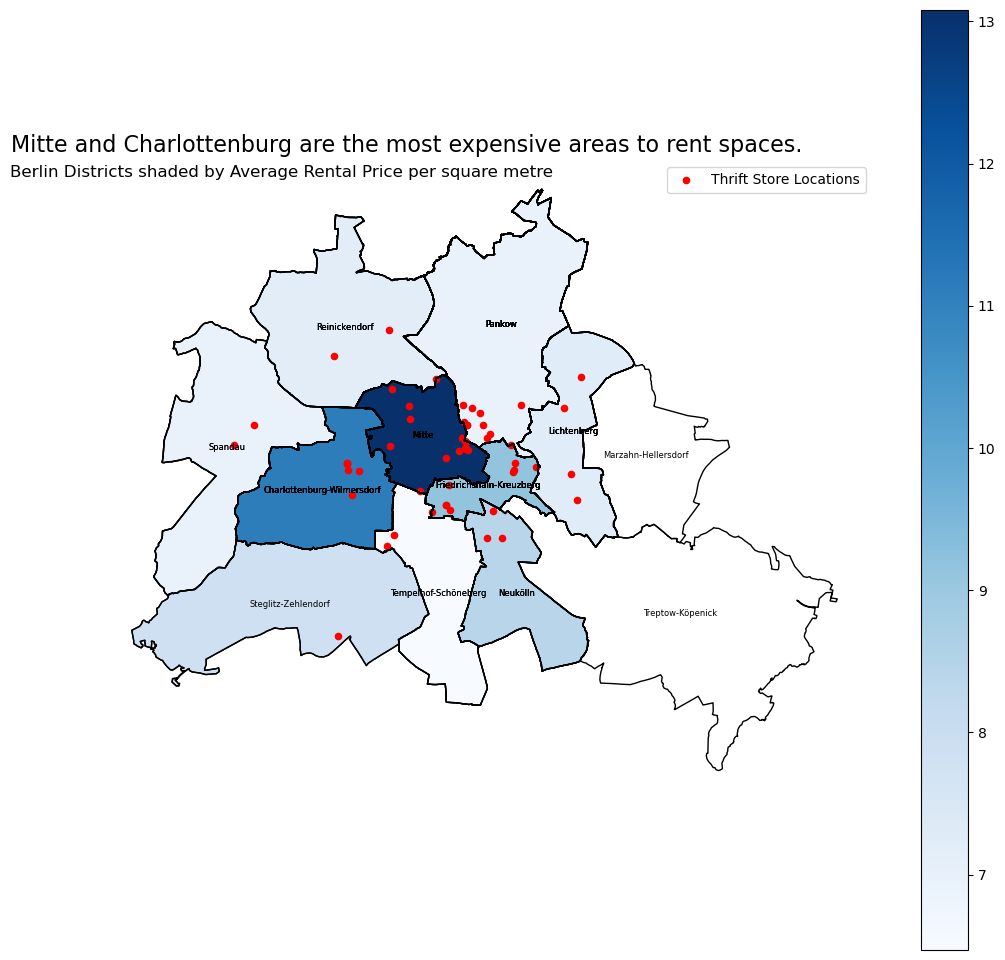

In [80]:
# Load the Berlin districts GeoJSON
districts = gpd.read_file('/Users/arjunchahal/Desktop/ESMT/Data Scraping/Working_Directory/working_folder/bezirksgrenzen.geojson')

# Merge with df_maps
districts = districts.merge(df_maps, left_on='Gemeinde_name', right_on='district', how='left')

# Plot the districts, colored by price_per_m2
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
districts.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot district boundaries
districts.plot(column='price_per_m2', ax=ax, legend=True, cmap='Blues', edgecolor='black', label = 'Avg Price/m^2')  # Shaded map using the Blues sequential colourmap

# Plot thrift store locations
df_maps.plot(kind='scatter', x='longitude', y='latitude', color='red', ax=ax, label='Thrift Store Locations')

for x, y, label in zip(districts.geometry.centroid.x, districts.geometry.centroid.y, districts['Gemeinde_name']):
    ax.text(x, y, label, fontsize=6, ha='center', va='center')

# Customize the plot, use x and y to manipulate title and subtitle positioning
plt.title('Mitte and Charlottenburg are the most expensive areas to rent spaces.', fontsize=16, x=0.4)
plt.suptitle('Berlin Districts shaded by Average Rental Price per square metre', x=0.2, y=0.8) 
plt.legend()

ax.set_axis_off() # hide the longitude and latitude axis

# Show the plot
plt.tight_layout()
plt.show()

In [28]:
df_maps['full_address'].head()

0    Pauls Boutique/Berlin, Oderberger Str. 47, 104...
1    ReSales Tiergarten-Schöneberg, Potsdamer Str. ...
2    HUMANA Secondhand & Vintage, Frankfurter Tor 3...
3              PeekUp, Karl-Marx-Platz 4, 12043 Berlin
4    Humana Secondhand & Vintage, Friedrichstraße 1...
Name: full_address, dtype: object

In [29]:
pip install geopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 1.9 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [30]:
from geopy.geocoders import Nominatim
import time

# Initialize the Nominatim geocoder
geolocator = Nominatim(user_agent="myGeocoder")

# Function to geocode an address
def geocode_address(address):
    try:
        location = geolocator.geocode(address, timeout=10)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error geocoding {address}: {e}")
        return None, None

# Apply the function to the 'full_address' column in your dataframe
df_maps['latitude'], df_maps['longitude'] = zip(*df_maps['street_address'].apply(geocode_address))

# Preview the dataframe with latitude and longitude
print(df_maps[['street_address', 'latitude', 'longitude']].head())

        street_address   latitude  longitude
0   Oderberger Str. 47  52.539009  13.407891
1   Potsdamer Str. 105  52.500260  13.363571
2    Frankfurter Tor 3  52.516747  13.454214
3    Karl-Marx-Platz 4  52.187629  11.045877
4  Friedrichstraße 148  52.519339  13.388183


/var/folders/l2/5dz48bnd55v2vjw18pnq7ftm0000gn/T/ipykernel_45423/1326543168.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maps['latitude'], df_maps['longitude'] = zip(*df_maps['street_address'].apply(geocode_address))
/var/folders/l2/5dz48bnd55v2vjw18pnq7ftm0000gn/T/ipykernel_45423/1326543168.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maps['latitude'], df_maps['longitude'] = zip(*df_maps['street_address'].apply(geocode_address))


In [31]:
df_maps

,name,full_address,street_address,rating,opening_status,working_hours,place_link,district,price_per_m2,latitude,longitude
0,Pauls Boutique/Berlin,"Pauls Boutique/Berlin, Oderberger Str. 47, 104...",Oderberger Str. 47,4.2,Open ⋅ Closes 8 pm,"{'Wednesday': ['12–8 pm'], 'Thursday': ['12–8 ...",https://www.google.com/maps/place/data=!3m1!4b...,Pankow,6.95,52.539009,13.407891
1,ReSales Tiergarten-Schöneberg,"ReSales Tiergarten-Schöneberg, Potsdamer Str. ...",Potsdamer Str. 105,4.3,Open ⋅ Closes 7 pm,"{'Wednesday': ['10 am–7 pm'], 'Thursday': ['10...",https://www.google.com/maps/place/data=!3m1!4b...,Mitte,13.08,52.500260,13.363571
2,HUMANA Secondhand & Vintage,"HUMANA Secondhand & Vintage, Frankfurter Tor 3...",Frankfurter Tor 3,4.0,Open ⋅ Closes 8 pm,"{'Wednesday': ['10 am–8 pm'], 'Thursday': ['10...",https://www.google.com/maps/place/data=!3m1!4b...,Friedrichshain-Kreuzberg,9.15,52.516747,13.454214
3,PeekUp,"PeekUp, Karl-Marx-Platz 4, 12043 Berlin",Karl-Marx-Platz 4,4.9,None,None,https://www.google.com/maps/place/data=!3m1!4b...,Neukölln,8.43,52.187629,11.045877
4,Humana Secondhand & Vintage,"Humana Secondhand & Vintage, Friedrichstraße 1...",Friedrichstraße 148,4.1,Open ⋅ Closes 8 pm,"{'Wednesday': ['10 am–8 pm'], 'Thursday': ['10...",https://www.google.com/maps/place/data=!3m1!4b...,Mitte,13.08,52.519339,13.388183
...,...,...,...,...,...,...,...,...,...,...,...
62,Dreikäsehoch Children's Second Hand,"Dreikäsehoch Children's Second Hand, Hauptstra...",Hauptstraße 73,4.4,Closed ⋅ Opens 12 pm Fri,"{'Wednesday': ['Closed'], 'Thursday': ['Closed...",https://www.google.com/maps/place/data=!3m1!4b...,Tempelhof-Schöneberg,6.47,49.410994,8.700496
63,Trödelmaik,"Trödelmaik, Senftenberger Str. 16, 02977 Hoyer...",Senftenberger Str. 16,5.0,Open ⋅ Closes 6 pm,"{'Wednesday': ['2–6 pm'], 'Thursday': ['2–6 pm...",https://www.google.com/maps/place/data=!3m1!4b...,None,NaN,51.473905,13.894797
64,Berlin-Military Showroom,"Berlin-Military Showroom, Sterkrader Str. 49-5...",Sterkrader Str. 49-59,NaN,None,None,https://www.google.com/maps/place/data=!3m1!4b...,Reinickendorf,7.17,51.562867,6.763795
65,Benjamin Engel Wohnungsauflösungen,"Benjamin Engel Wohnungsauflösungen, Bahnhofstr...",Bahnhofstraße 19,4.5,Closed ⋅ Opens 11 am Thu,"{'Wednesday': ['Closed'], 'Thursday': ['11 am–...",https://www.google.com/maps/place/data=!3m1!4b...,None,NaN,49.142502,9.210941


In [79]:
import numpy as np

# Apply conditions to filter valid latitude and longitude values
df_maps.loc[~((df_maps['latitude'].between(52.4, 52.7)) & (df_maps['longitude'].between(13.1, 14))), ['latitude', 'longitude']] = np.nan

# Preview the updated dataframe
print(df_maps[['name', 'latitude', 'longitude']].head())

                            name   latitude  longitude
0          Pauls Boutique/Berlin  52.539020  13.407850
1  ReSales Tiergarten-Schöneberg  52.500366  13.363554
2    HUMANA Secondhand & Vintage  52.516715  13.454294
3                         PeekUp  52.473459  13.441441
4    Humana Secondhand & Vintage  52.519382  13.388173
